
# Advecting Flow Paths

Vapor can advect and render flow paths through your data.


In [1]:
import example_utils
from vapor import session, renderer, dataset, camera

ses = session.Session()
data = example_utils.OpenExampleDataset(ses)

Vapor 3.9.3
Python 3.9.19 (/opt/anaconda3/envs/vapor)
OpenGL 4.1 Metal - 83.1



## Default advection

When you create a Flow renderer, the default advection will create a regularly dispersed grid of seed points and simulate a streamline advection in 2D or 3D, depending on the provided variables.


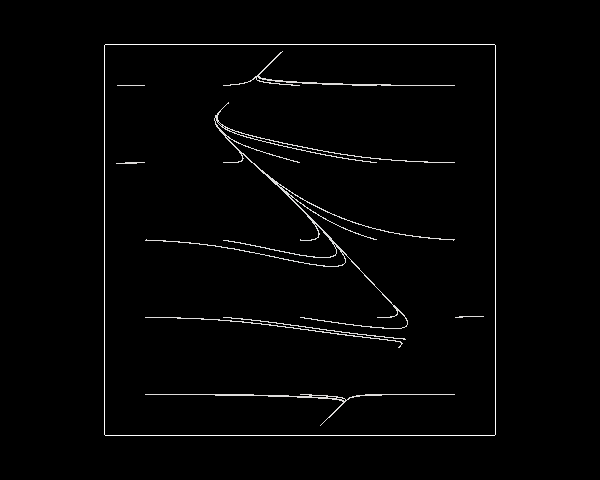

In [2]:
# Use first 2 2D variables as our U,V for the flow advection
dimension = 2
U,V = data.GetDataVarNames(dimension)[0:2]

ren:renderer.FlowRenderer = data.NewRenderer(renderer.FlowRenderer)
ren.SetFieldVariableNames([U, V])
ses.GetCamera().ViewAll()
ses.Show()


## Rendering techniques

The rendering of the flow paths can be configured. A few examples are shown below.
Call help(renderer.FlowRenderer) to see additional options.


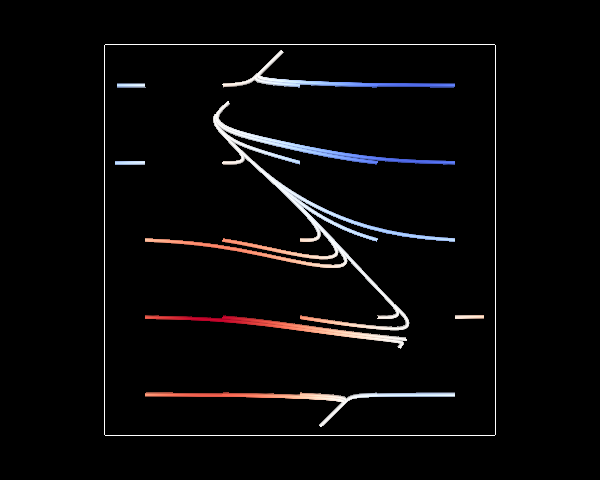

In [3]:
ren.SetRenderType(ren.RenderType.RenderTypeStream)
ren.SetRenderRadiusScalar(3)
ren.SetRenderGeom3D(True)
ren.SetColorMapVariableName(U)
ses.Show()


Rather than rendering the flow lines, you can also render the sample points that are taken along the flow path individually.


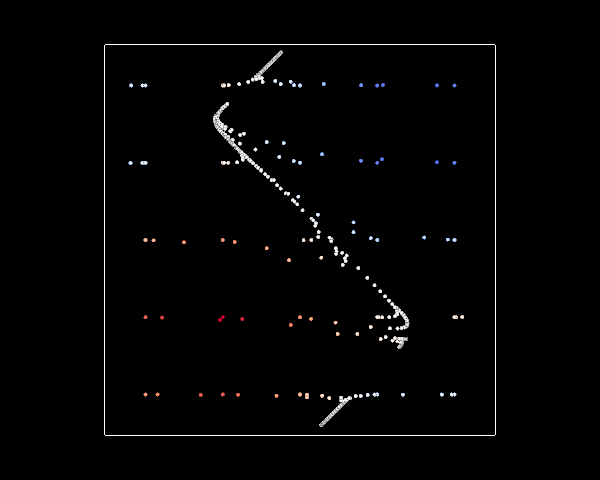

In [4]:
ren.SetRenderType(ren.RenderType.RenderTypeSamples)
ses.Show()

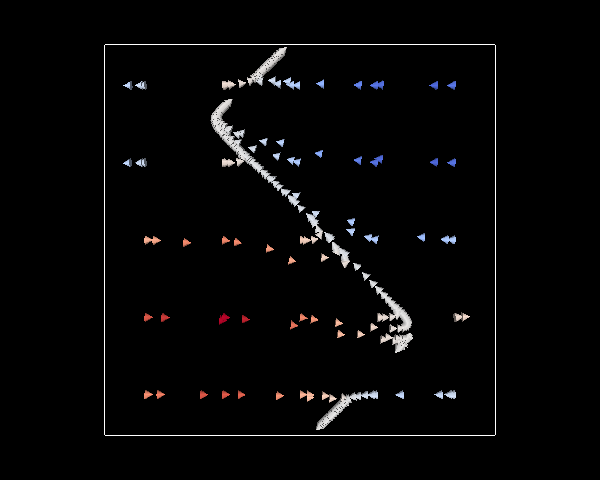

In [5]:
ren.SetRenderGlyphType(ren.GlpyhType.GlpyhTypeArrow)
ren.SetRenderRadiusScalar(7)
ses.Show()

In [6]:
# Reset the rendering style for the next section
ren.SetRenderRadiusScalar(3)
ren.SetRenderType(ren.RenderType.RenderTypeStream)


## Seeding the advection

The seeds from which the advected particles start can be configured in a variety of manners.
Call help(renderer.FlowRenderer) to see additional options.



### Uniform Distribution

This is the default. It creates a uniformly distributed grid of seed points over the area/volume of the advected region.


Seeding a [5, 5] grid over ([20.0, 20.0, 0.0], [40.0, 40.0, 0.0])


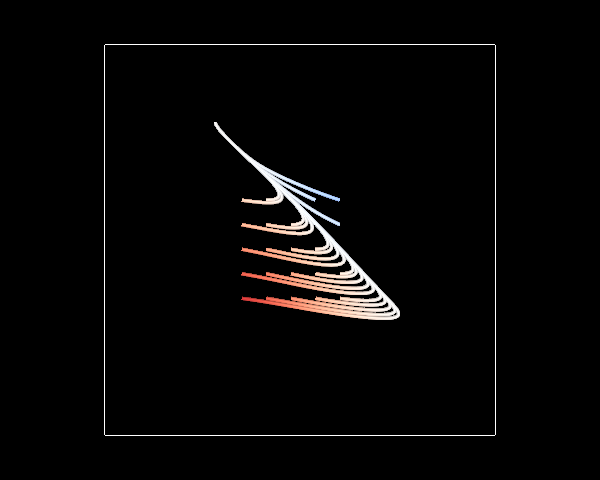

In [7]:
ren.SetSeedGenMode(ren.FlowSeedMode.UNIFORM)
rake = ren.GetRakeRegion()
defaultRakeExtents = rake.GetExtents()
rake.SetExtents((20, 20), (40, 40))
print(f"Seeding a {ren.GetGridNumOfSeeds()} grid over {rake.GetExtents()}")
ses.Show()
rake.SetExtents(*defaultRakeExtents)


### Random Distribution


Seeding 50 random points over ([0.0, 0.0, 0.0], [63.0, 63.0, 63.0])


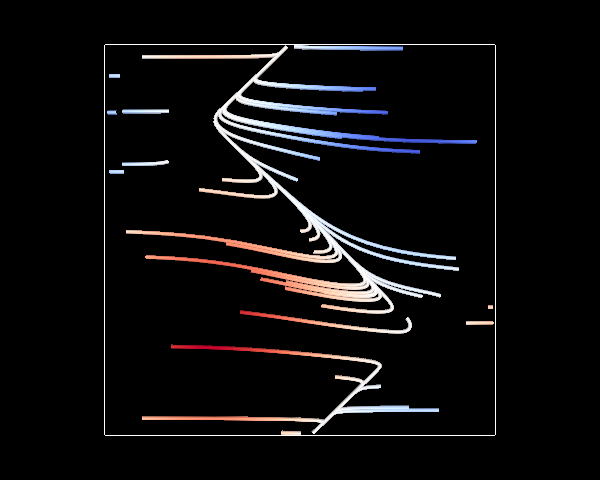

In [8]:
ren.SetSeedGenMode(ren.FlowSeedMode.RANDOM)
print(f"Seeding {ren.GetRandomNumOfSeeds()} random points over {rake.GetExtents()}")
ses.Show()


### Biased Distribution

This generates a random list of seed points however they are biased by a given variable.
The number of seed points can be higher or lower based on the value of the `RakeBiasVariable`.
You can set the `RakeBiasStrength` to a negative value to invert the bias.


Seeding 50 random points biased by V10 over ([0.0, 0.0, 0.0], [63.0, 63.0, 63.0])


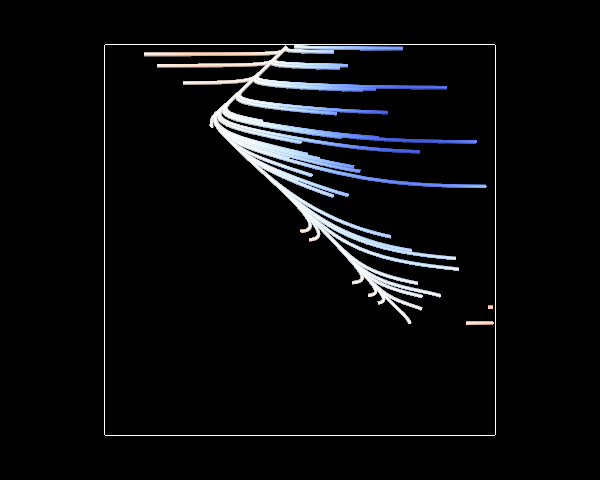

In [9]:
ren.SetSeedGenMode(ren.FlowSeedMode.RANDOM_BIAS)
ren.SetRakeBiasVariable(V)
ren.SetRakeBiasStrength(1)
print(f"Seeding {ren.GetRandomNumOfSeeds()} random points biased by {ren.GetRakeBiasVariable()} over {rake.GetExtents()}")
ses.Show()


### Manual List

You can pass in a manually created list of seeds using a basic text file format.
The code below generates an example seed file and passes it to Vapor.
The full documentation for the seed file format can be found on Vapor's website.


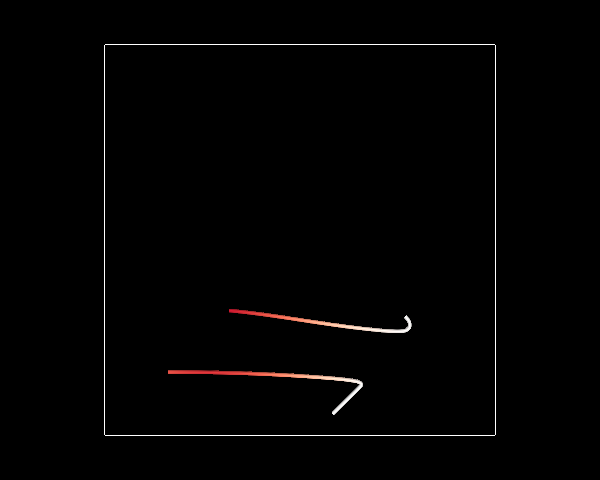

In [10]:
with open("flow_seeds.txt", "w") as f:
    print("# X, Y, Z, T (optional)", file=f)
    print("10, 10, 0", file=f)
    print("20, 20, 0", file=f)

ren.SetSeedGenMode(ren.FlowSeedMode.LIST)
ren.SetSeedInputFilename("flow_seeds.txt")
ses.Show()